In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
# Read in home sales data
home_sales_df = pd.read_csv('../Source/Metro_sales_count_monthly.csv')
home_sales_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,...,11/30/2023,12/31/2023,1/31/2024,2/29/2024,3/31/2024,4/30/2024,5/31/2024,6/30/2024,7/31/2024,8/31/2024
0,102001,0,United States,country,NaN,200263,231896,257463,283461,296547,...,258258,246648,211949,234310,282773,318615,350767,326229,340368,332735
1,394913,1,"New York, NY",msa,NY,8416,8883,9809,10081,10685,...,11143,10675,10345,8916,10063,10993,12208,12446,13878,14512
2,753899,2,"Los Angeles, CA",msa,CA,4141,5044,6065,6868,7222,...,5119,4974,4401,4980,6101,6714,7119,6380,7027,7315
3,394463,3,"Chicago, IL",msa,IL,5570,6908,7230,7931,8781,...,7022,7129,5512,5765,7661,9277,10195,9768,10487,10850
4,394514,4,"Dallas, TX",msa,TX,4875,5519,5988,6679,6672,...,4625,4706,4207,5137,6144,6969,7458,6465,6758,6677


In [3]:
# Define the columns to keep:
# First five columns
columns_to_keep = home_sales_df.columns[:5]

In [4]:
# Extract year from columns and identify columns for  2018, 2019, 2020, 2021, and 2022
def extract_year_from_column(col_name):
    try:
        return col_name.split('/')[2]  # Extract year from 'YYYY-MM-DD'
    except IndexError:
        return None

In [5]:
# Create a set of years to keep
years_to_keep = {'2018', '2019', '2020', '2021', '2022'}

In [6]:
# Filter columns to keep only those starting with the specified years
columns_for_years = [col for col in home_sales_df.columns if extract_year_from_column(col) in years_to_keep]

In [7]:
# Combine the columns to keep
all_columns_to_keep = list(columns_to_keep) + columns_for_years

In [8]:
# Filter DataFrame
home_sales_df_filtered = home_sales_df[all_columns_to_keep]
home_sales_df_filtered

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,...,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022
0,102001,0,United States,country,NaN,280933,278908,380147,401495,463931,...,441561,439319,464680,482675,412149,428785,379953,332027,286113.0,272462
1,394913,1,"New York, NY",msa,NY,14617,12540,14184,14950,16953,...,18338,16448,17902,21234,19507,20758,16815,15084,14285.0,13202
2,753899,2,"Los Angeles, CA",msa,CA,6842,6768,9759,9357,10332,...,10348,9912,9420,9226,7506,7867,7255,6251,5413.0,5204
3,394463,3,"Chicago, IL",msa,IL,7426,7001,10927,12751,15250,...,12383,12704,13720,14908,12464,12098,10896,9063,8062.0,7221
4,394514,4,"Dallas, TX",msa,TX,5260,6027,7677,7913,9379,...,7960,8116,8875,8923,8010,8344,7200,6163,5087.0,4967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,395006,92,"Provo, UT",msa,UT,474,542,664,681,819,...,1003,956,995,953,722,780,684,505,436.0,420
90,395160,93,"Toledo, OH",msa,OH,452,446,624,653,833,...,633,697,787,838,835,812,726,684,569.0,598
91,395224,94,"Wichita, KS",msa,KS,429,408,676,675,849,...,445,470,464,556,470,525,346,390,288.0,291
92,394549,95,"Durham, NC",msa,NC,538,552,858,920,1098,...,932,965,1104,1163,939,874,775,671,582.0,576


In [9]:
# Function to check if a column name is a date and convert it
def format_column_date(column_name):
    try:
        # Attempt to convert to datetime and then format
        return pd.to_datetime(column_name).strftime('%Y-%m-%d')
    except:
        # If conversion fails, return the original column name (for non-date columns)
        return column_name

# Apply the function to all column names
home_sales_df_filtered.columns = [format_column_date(col) for col in home_sales_df_filtered.columns]

# Display the updated DataFrame with renamed columns
home_sales_df_filtered.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
0,102001,0,United States,country,NaN,280933,278908,380147,401495,463931,...,441561,439319,464680,482675,412149,428785,379953,332027,286113.0,272462
1,394913,1,"New York, NY",msa,NY,14617,12540,14184,14950,16953,...,18338,16448,17902,21234,19507,20758,16815,15084,14285.0,13202
2,753899,2,"Los Angeles, CA",msa,CA,6842,6768,9759,9357,10332,...,10348,9912,9420,9226,7506,7867,7255,6251,5413.0,5204
3,394463,3,"Chicago, IL",msa,IL,7426,7001,10927,12751,15250,...,12383,12704,13720,14908,12464,12098,10896,9063,8062.0,7221
4,394514,4,"Dallas, TX",msa,TX,5260,6027,7677,7913,9379,...,7960,8116,8875,8923,8010,8344,7200,6163,5087.0,4967


In [12]:
# Select columns for date rang (2018-2022)
date_columns = [col for col in home_sales_df.columns if '2018' in col or 
                '2019' in col or '2020' in col or '2021' in col or '2022' in col]

In [13]:
# calculate avg housing price for each month
average_housing_sales = home_sales_df[date_columns].mean()

In [14]:
# Convert to a DataFrame
average_housing_sales_df = average_housing_sales.reset_index()
average_housing_sales_df.columns = ['Date', 'Average_Sales']

In [15]:
print(average_housing_sales_df['Date'].head())

0    1/31/2018
1    2/28/2018
2    3/31/2018
3    4/30/2018
4    5/31/2018
Name: Date, dtype: object


In [16]:
# If the date strings are in a different format, try using the 'infer_datetime_format' parameter
average_housing_sales_df['Date'] = pd.to_datetime(average_housing_sales_df['Date'], infer_datetime_format=True, errors='coerce')


C:\Users\taire\AppData\Local\Temp\ipykernel_25208\1409545561.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  average_housing_sales_df['Date'] = pd.to_datetime(average_housing_sales_df['Date'], infer_datetime_format=True, errors='coerce')


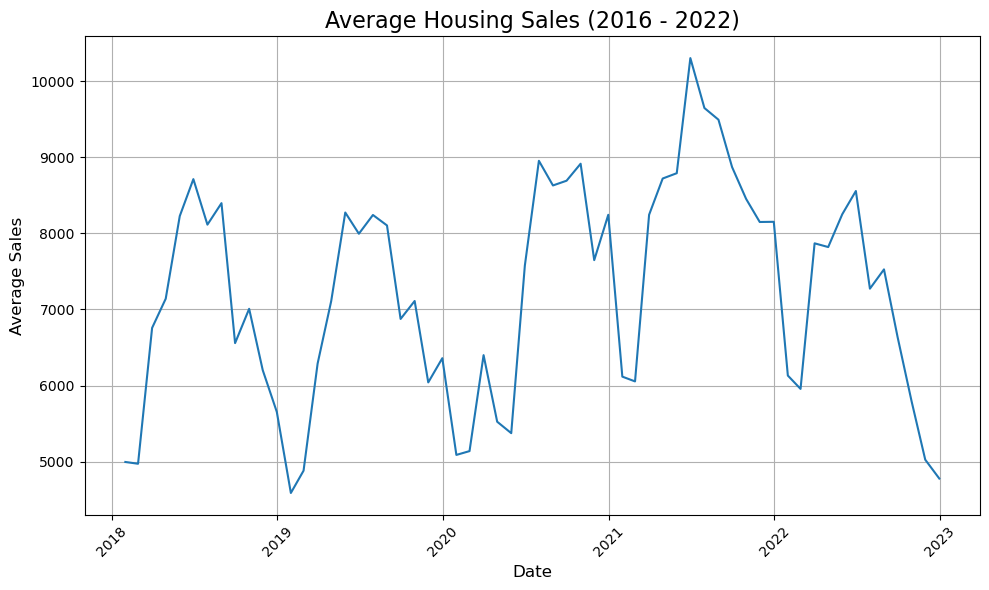

In [17]:
# Plot average housing prices over time
plt.figure(figsize=(10, 6))
plt.plot(average_housing_sales_df['Date'], average_housing_sales_df['Average_Sales'])

# Add labels and title
plt.title('Average Housing Sales (2016 - 2022)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.grid(True)

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

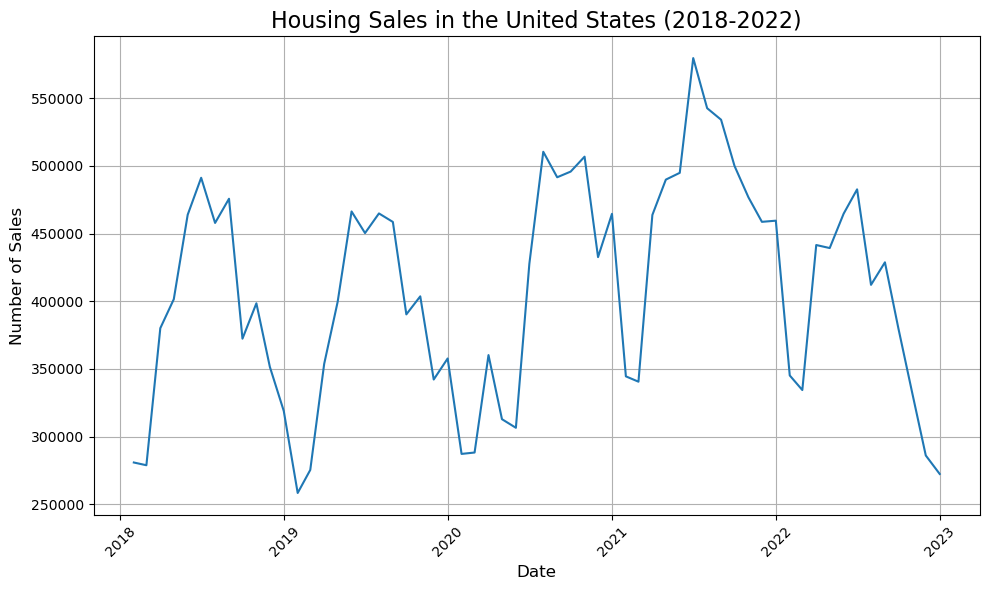

In [18]:
# Select the United States row (assuming RegionID = 102001 or adjust accordingly)
us_home_sales = home_sales_df_filtered[home_sales_df_filtered['RegionName'] == 'United States']

# Transpose the DataFrame to have dates as rows (instead of columns)
us_home_sales_transposed = us_home_sales.iloc[:, 5:].T  # Assuming first few columns are non-date related

# Rename the index to 'Date' for clarity
us_home_sales_transposed.index.name = 'Date'

# Convert the index to datetime for plotting
us_home_sales_transposed.index = pd.to_datetime(us_home_sales_transposed.index)

# Rename the columns to something meaningful
us_home_sales_transposed.columns = ['Sales']

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(us_home_sales_transposed.index, us_home_sales_transposed['Sales'])

# Title and labels
plt.title('Housing Sales in the United States (2018-2022)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the graph
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
# Export as a json file
home_sales_df_filtered.head(1).to_json('us_home_sales_data_2018_2022.json', orient='records', indent=4)

In [20]:
rental_df = pd.read_csv('../Source/Metro_Rentals.csv')
rental_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31
0,102001,0,United States,country,NaN,1310.862067,1317.635432,1326.592064,1337.166174,1347.094223,...,2213.347989,2213.517002,2214.817776,2222.706032,2233.819378,2249.433872,2262.554936,2275.422072,2285.166408,2294.365189
1,394913,1,"New York, NY",msa,NY,2227.886183,2251.118894,2267.851695,2284.702372,2288.073225,...,3443.856725,3424.581955,3442.399810,3485.052220,3519.700761,3562.290444,3572.887480,3602.208908,3614.929134,3640.093145
2,753899,2,"Los Angeles, CA",msa,CA,2621.942240,2633.999717,2654.095188,2664.578607,2690.731090,...,4292.282261,4288.887028,4298.547999,4324.901797,4338.474621,4359.776105,4378.386198,4403.227148,4421.621816,4438.079122
3,394463,3,"Chicago, IL",msa,IL,1583.391402,1588.623986,1598.554829,1611.847686,1625.919714,...,2340.672442,2340.558121,2348.018327,2358.976467,2372.088107,2383.105108,2410.442615,2433.382921,2449.264443,2459.756492
4,394514,4,"Dallas, TX",msa,TX,1409.839384,1418.548124,1429.044332,1443.495065,1457.098272,...,2340.480691,2344.493677,2343.881654,2353.395281,2357.393728,2376.919987,2390.547515,2397.750797,2402.623029,2407.581733


In [79]:
# Define the columns to keep:
# First five columns
columns_to_keep = rental_df.columns[:5]

In [21]:
# Select the columns for rental prices from 2018 to 2022
rental_date_columns = [col for col in rental_df.columns if '2018' in col or 
                       '2019' in col or '2020' in col or '2021' in col or '2022' in col]

In [22]:
# Calculate the average rental price for each month 
average_rental_prices = rental_df[rental_date_columns].mean()

# Convert to a DataFrame 
average_rental_prices_df = average_rental_prices.reset_index()
average_rental_prices_df.columns = ['Date', 'Average_Price']

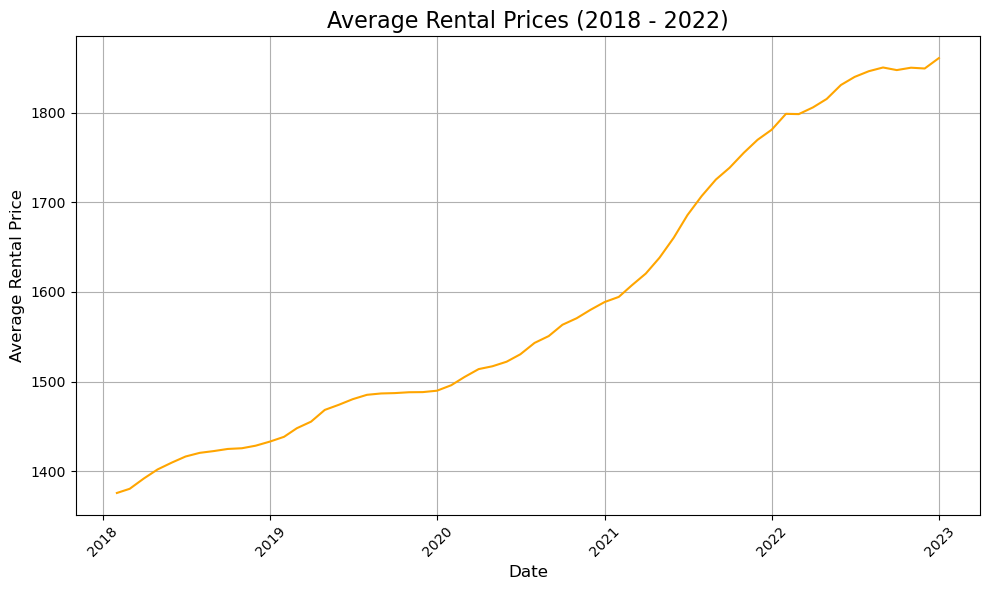

In [23]:
# Convert the 'Date' column to datetime format for better plotting
average_rental_prices_df['Date'] = pd.to_datetime(average_rental_prices_df['Date'], format='%Y-%m-%d')

# Plot the average rental prices over time
plt.figure(figsize=(10, 6))

# Plot with smaller markers for better visibility
plt.plot(average_rental_prices_df['Date'], average_rental_prices_df['Average_Price'], color='orange')

# Add labels and title
plt.title('Average Rental Prices (2018 - 2022)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Rental Price', fontsize=12)
plt.grid(True)

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
# Export as a json file
average_rental_prices_df.head(1).to_json('us_rental_prices_data_2018_2022.json', orient='records', indent=4)

In [25]:
# Define the columns to keep:
# First five columns
rental_columns_to_keep = rental_df.columns[:5]

In [26]:
# Extract year from columns and identify columns for  2018, 2019, 2020, 2021, and 2022
def extract_year_from_column(col_name):
    try:
        return col_name.split('-')[0]  # Extract year from 'YYYY-MM-DD'
    except IndexError:
        return None

In [27]:
# Create a set of years to keep
rental_years_to_keep = {'2018', '2019', '2020', '2021', '2022'}

In [28]:
# Filter columns to keep only those starting with the specified years
rental_columns_for_years = [col for col in rental_df.columns if extract_year_from_column(col) in rental_years_to_keep]

In [29]:
# Combine the columns to keep
rental_all_columns_to_keep = list(rental_columns_to_keep) + rental_columns_for_years

In [30]:
# Filter DataFrame
rental_df_filtered = rental_df[rental_all_columns_to_keep]
rental_df_filtered

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
0,102001,0,United States,country,NaN,1492.307015,1500.575103,1512.124266,1523.495113,1533.272269,...,2007.801555,2030.730705,2050.214834,2070.178371,2085.880083,2099.482303,2105.888250,2110.200428,2109.419953,2114.130270
1,394913,1,"New York, NY",msa,NY,2481.789197,2493.801763,2501.112417,2512.497231,2528.090717,...,3172.255555,3206.621176,3220.636557,3243.707165,3272.591000,3293.757880,3297.355457,3287.237960,3280.722607,3288.670015
2,753899,2,"Los Angeles, CA",msa,CA,3061.029038,3074.721013,3100.590036,3122.469176,3139.871243,...,3953.470276,3997.824523,4035.242157,4066.267644,4093.007327,4103.510716,4107.900815,4115.784361,4124.308643,4129.382714
3,394463,3,"Chicago, IL",msa,IL,1706.707926,1715.230467,1730.066002,1745.125546,1754.080290,...,2077.437362,2102.948263,2130.863290,2148.935018,2165.525934,2180.778099,2184.434050,2188.724107,2181.159121,2195.342046
4,394514,4,"Dallas, TX",msa,TX,1626.739855,1634.984148,1642.082859,1654.594918,1662.557030,...,2146.303049,2172.401578,2196.891718,2224.416778,2241.131629,2252.846645,2258.895016,2265.855891,2270.958640,2274.092921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,395004,872,"Prineville, OR",msa,OR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
532,845169,874,"Rockport, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
533,394687,875,"Hood River, OR",msa,OR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
534,394996,915,"Portales, NM",msa,NM,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
# Export as a json file
rental_df_filtered.head(1).to_json('us_rental_data_2018_2022.json', orient='records', indent=4)

In [31]:
# Read in home Values data
home_values_df = pd.read_csv('../Source/Metro_Home_Values.csv')
home_values_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31
0,102001,0,United States,country,NaN,123951.733006,124163.176264,124425.524492,124988.958362,125637.500450,...,355986.448327,356640.365507,357118.576760,357576.035711,358418.372959,360011.602927,361969.362164,3.635033e+05,3.641659e+05,3.643848e+05
1,394913,1,"New York, NY",msa,NY,219657.598399,220586.011622,221519.660004,223407.993412,225353.501267,...,656116.650291,658992.330717,662322.088290,665541.460972,669925.455906,675684.524493,682290.159549,6.873056e+05,6.905686e+05,6.932481e+05
2,753899,2,"Los Angeles, CA",msa,CA,236649.976987,237553.116159,238728.814647,241071.926563,243614.826354,...,978656.081035,988006.132016,993962.586203,994044.629696,990763.189872,989599.749912,993777.833894,1.000601e+06,1.005222e+06,1.010107e+06
3,394463,3,"Chicago, IL",msa,IL,159899.676257,160054.921113,160340.806271,161051.946252,161901.787792,...,328270.794339,329219.545752,329991.513159,330838.545303,332482.161364,335195.288195,338356.149580,3.407269e+05,3.421063e+05,3.429366e+05
4,394514,4,"Dallas, TX",msa,TX,129057.198121,129114.277857,129184.712729,129363.326656,129593.351700,...,380533.777024,380382.508383,380056.886976,380085.827764,380580.411239,381762.207346,382759.281581,3.829150e+05,3.822440e+05,3.812958e+05


In [51]:
# Define the columns to keep:
# First five columns
v_columns_to_keep = home_values_df.columns[:5]

In [52]:
# Extract year from columns and identify columns for  2018, 2019, 2020, 2021, and 2022
def extract_year_from_column(col_name):
    try:
        return col_name.split('-')[0]  # Extract year from 'YYYY-MM-DD'
    except IndexError:
        return None

In [53]:
# Create a set of years to keep
v_years_to_keep = {'2018', '2019', '2020', '2021', '2022'}

In [54]:
# Filter columns to keep only those starting with the specified years
v_columns_for_years = [col for col in home_values_df.columns if extract_year_from_column(col) in years_to_keep]

In [55]:
# Combine the columns to keep
v_all_columns_to_keep = list(v_columns_to_keep) + v_columns_for_years

In [56]:
# Filter DataFrame
home_values_df_filtered = home_values_df[v_all_columns_to_keep]
home_values_df_filtered

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
0,102001,0,United States,country,NaN,224936.796550,226157.453423,227565.539106,228842.102569,230082.570244,...,332629.950264,339020.793617,344703.243672,349430.700834,351906.799070,352272.772884,350965.103895,349689.284248,348607.881444,347625.532668
1,394913,1,"New York, NY",msa,NY,463017.101885,464158.423743,465701.288710,467504.840445,470101.391909,...,610178.591413,617285.770917,624597.079863,631422.139260,635903.307082,637158.845303,635105.837835,632819.055749,631064.534234,630187.513866
2,753899,2,"Los Angeles, CA",msa,CA,638731.698987,647011.238731,654593.420165,660197.450254,664766.997359,...,929269.604158,945664.677506,958438.584519,965505.838276,967446.116961,963907.246222,957523.439461,951515.596293,947207.399802,943756.340594
3,394463,3,"Chicago, IL",msa,IL,236282.561846,237720.864245,239312.987501,240526.639118,241506.784950,...,305824.990782,310947.100611,314607.212012,317120.968172,317827.554928,317188.064539,315303.239716,313780.152712,312882.553608,312477.242332
4,394514,4,"Dallas, TX",msa,TX,240619.136380,242460.468024,244316.719062,245975.013110,247536.574326,...,361615.483923,371151.091319,379780.350552,387171.337190,391212.571612,391855.624958,390091.899048,387966.735341,386005.006674,383983.014489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,753929,935,"Zapata, TX",msa,TX,118402.297700,117954.829677,118335.865325,119235.800872,120046.621614,...,145454.961640,144112.231681,144207.105649,145969.486005,147654.949852,147731.021529,145732.144639,143459.882216,140090.098976,136256.657830
891,394743,936,"Ketchikan, AK",msa,AK,328997.433053,331176.961258,334557.354451,337993.700213,340586.812203,...,424880.605044,427683.152403,432380.124763,438555.680642,443236.690933,445815.804556,445913.344006,446063.451396,445220.415577,443586.108195
892,753874,937,"Craig, CO",msa,CO,171582.432328,172295.547470,173195.430489,173452.919113,173230.472484,...,251495.912757,255057.674024,257847.213522,260974.631866,263269.691184,265147.087552,266329.377785,267913.388431,269449.684215,271197.640362
893,395188,938,"Vernon, TX",msa,TX,73459.367625,73769.922979,74531.425581,75265.290896,75846.784779,...,100726.626245,101946.287031,103014.916880,104046.278462,104847.801929,104937.718418,104976.419367,104578.205570,103436.541426,100623.880860


In [57]:
# Select the columns for rental prices from 2018 to 2022
home_values_columns = [col for col in home_values_df.columns if '2018' in col or 
                       '2019' in col or '2020' in col or '2021' in col or '2022' in col]

In [58]:
# Calculate the average rental price for each month 
average_home_value = home_values_df[home_values_columns].mean()

# Convert to a DataFrame 
average_home_value_df = average_home_value.reset_index()
average_home_value_df.columns = ['Date', 'Average_Price']

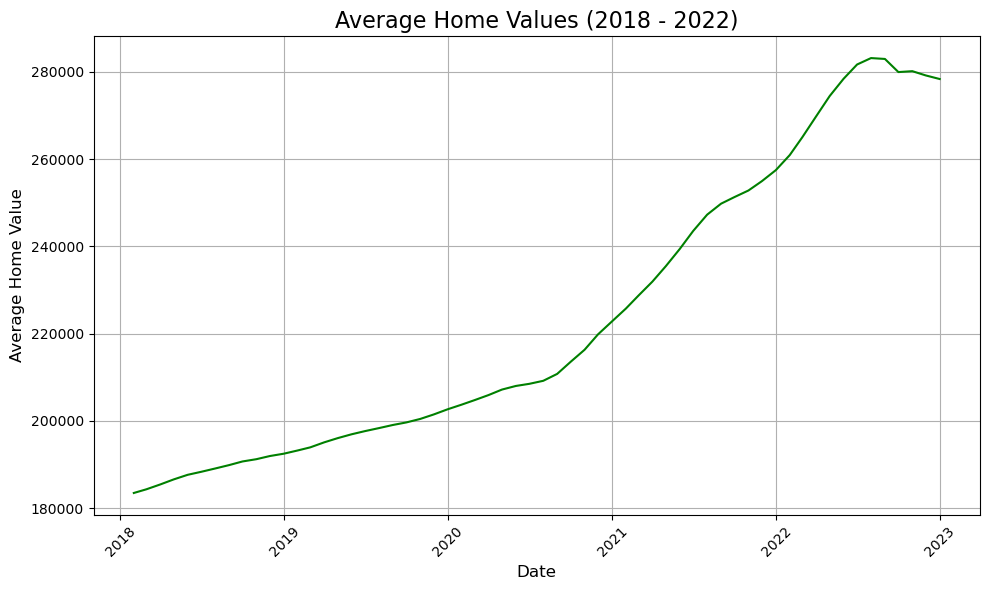

In [61]:
# Convert the 'Date' column to datetime format for better plotting
average_home_value_df['Date'] = pd.to_datetime(average_home_value_df['Date'], format='%Y-%m-%d')

# Plot the average rental prices over time
plt.figure(figsize=(10, 6))

# Plot with smaller markers for better visibility
plt.plot(average_home_value_df['Date'], average_home_value_df['Average_Price'], color='green')

# Add labels and title
plt.title('Average Home Values (2018 - 2022)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Home Value', fontsize=12)
plt.grid(True)

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [80]:
# Export as a json file
home_values_df_filtered.head(1).to_json('us_home_value_data_2018_2022.json', orient='records', indent=4)

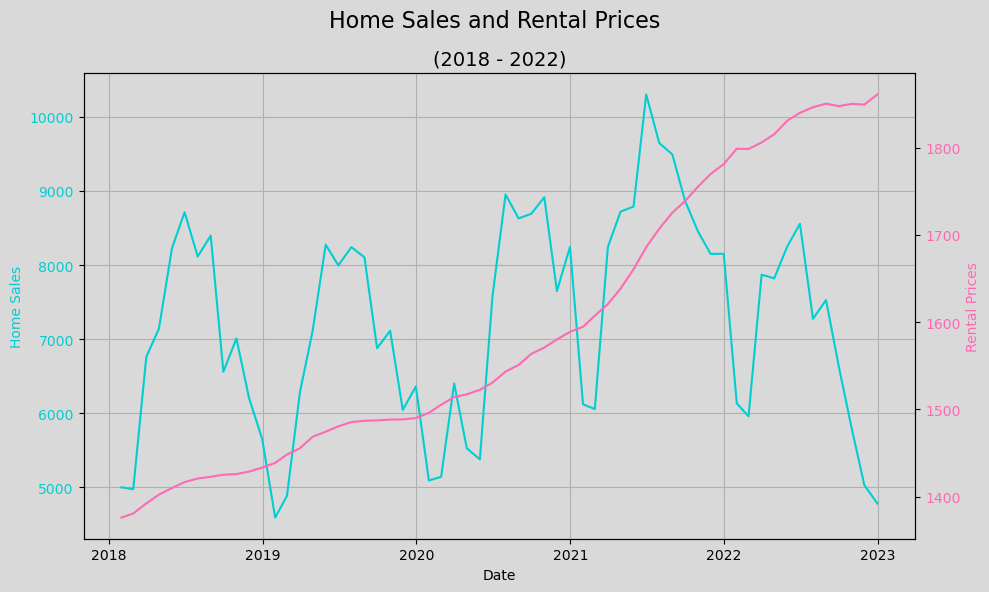

In [63]:
# Step 2: Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot home sales on the primary y-axis (left) with the teal color
color = '#00CED1'  # Teal color for home sales
ax1.set_xlabel('Date')
ax1.set_ylabel('Home Sales', color=color)
ax1.plot(average_housing_sales_df['Date'], average_housing_sales_df['Average_Sales'], 
         color=color, label='Home Sales')
ax1.tick_params(axis='y', labelcolor=color)

# Step 3: Create a secondary y-axis for the rental prices (right) with the pink color
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = '#FF69B4'  # Pink color for rental prices
ax2.set_ylabel('Rental Prices', color=color)  # we already handled the x-label with ax1
ax2.plot(average_rental_prices_df['Date'], average_rental_prices_df['Average_Price'], 
         color=color, label='Rental Prices')
ax2.tick_params(axis='y', labelcolor=color)

# Step 4: Add title and grid
plt.title('(2018 - 2022)', fontsize=14)
ax1.grid(True)

# Add subheading
plt.suptitle('Home Sales and Rental Prices', fontsize=16)


# Change the background color
ax1.set_facecolor('#D9D9D9')  # Set the background color for the primary axis
ax2.set_facecolor('#D9D9D9')  # Set the background color for the secondary axis (if applicable)
fig.patch.set_facecolor('#D9D9D9')

# Step 5: Display the plot
fig.tight_layout()  # adjust subplots to fit into figure area.
plt.xticks(rotation=45)
#plt.savefig("../IMAGES/HomeSales_and_RentalPrices.png")
plt.show()

In [75]:
unemployment_rate_df = pd.read_csv('../Source/UnemploymentRate.csv')
unemployment_rate_df.head()

,DATE,UNRATE
0,1/1/1948,3.4
1,2/1/1948,3.8
2,3/1/1948,4.0
3,4/1/1948,3.9
4,5/1/1948,3.5


In [76]:
# Step 2: Convert the 'DATE' column to datetime format
unemployment_rate_df['DATE'] = pd.to_datetime(unemployment_rate_df['DATE'])

# Step 3: Filter data for the years 2018-2022
filtered_unemployment_df = unemployment_rate_df[(unemployment_rate_df['DATE'].dt.year >= 2018) & (unemployment_rate_df['DATE'].dt.year <= 2022)]

# Step 4: Create a JSON-like dictionary with formatted dates
unemployment_json_data = {}
for index, row in filtered_unemployment_df.iterrows():
    # Format the date to match the required format 'YYYY-MM-DDT00:00:00.000'
    date_str = row['DATE'].strftime('%Y-%m-%dT00:00:00.000')
    
    # Create the JSON entry for this row
    unemployment_json_data[date_str] = {
        "Unemployment Rate": row['UNRATE'],
        "Year": row['DATE'].year
    }

# Step 5: Write the dictionary to a JSON file
with open('unemployment_data_2018_2022.json', 'w') as json_file:
    json.dump(unemployment_json_data, json_file, indent=0)

# Optional: Print the JSON string to check the output
print(json.dumps(unemployment_json_data, indent=0))

{
"2018-01-01T00:00:00.000": {
"Unemployment Rate": 4.0,
"Year": 2018
},
"2018-02-01T00:00:00.000": {
"Unemployment Rate": 4.1,
"Year": 2018
},
"2018-03-01T00:00:00.000": {
"Unemployment Rate": 4.0,
"Year": 2018
},
"2018-04-01T00:00:00.000": {
"Unemployment Rate": 4.0,
"Year": 2018
},
"2018-05-01T00:00:00.000": {
"Unemployment Rate": 3.8,
"Year": 2018
},
"2018-06-01T00:00:00.000": {
"Unemployment Rate": 4.0,
"Year": 2018
},
"2018-07-01T00:00:00.000": {
"Unemployment Rate": 3.8,
"Year": 2018
},
"2018-08-01T00:00:00.000": {
"Unemployment Rate": 3.8,
"Year": 2018
},
"2018-09-01T00:00:00.000": {
"Unemployment Rate": 3.7,
"Year": 2018
},
"2018-10-01T00:00:00.000": {
"Unemployment Rate": 3.8,
"Year": 2018
},
"2018-11-01T00:00:00.000": {
"Unemployment Rate": 3.8,
"Year": 2018
},
"2018-12-01T00:00:00.000": {
"Unemployment Rate": 3.9,
"Year": 2018
},
"2019-01-01T00:00:00.000": {
"Unemployment Rate": 4.0,
"Year": 2019
},
"2019-02-01T00:00:00.000": {
"Unemployment Rate": 3.8,
"Year": 2019
},
"201

In [72]:
mortgage_rate_df = pd.read_csv('../Source/MORTGAGE30US.csv')
mortgage_rate_df.head()

,DATE,MORTGAGE30US
0,4/2/1971,7.33
1,4/9/1971,7.31
2,4/16/1971,7.31
3,4/23/1971,7.31
4,4/30/1971,7.29


In [74]:
# Convert the 'DATE' column to datetime format
mortgage_rate_df['DATE'] = pd.to_datetime(mortgage_rate_df['DATE'])

# Step 3: Filter data for the years 2018-2022
filtered_mortgage_rate_df = mortgage_rate_df[(mortgage_rate_df['DATE'].dt.year >= 2018) & (mortgage_rate_df['DATE'].dt.year <= 2022)]

# Step 4: Create a JSON-like dictionary with formatted dates
mortgage_json_data = {}
for index, row in filtered_mortgage_rate_df.iterrows():
    # Format the date to match the required format 'YYYY-MM-DDT00:00:00.000'
    date_str = row['DATE'].strftime('%Y-%m-%dT00:00:00.000')
    
    # Create the JSON entry for this row
    mortgage_json_data[date_str] = {
        "Mortgage Rate": row['MORTGAGE30US'],
        "Year": row['DATE'].year
    }

# Step 5: Write the dictionary to a JSON file
with open('mortgage_rate__data_2018_2022.json', 'w') as json_file:
    json.dump(mortgage_json_data, json_file, indent=0)

# Optional: Print the JSON string to check the output
print(json.dumps(mortgage_json_data, indent=0))

{
"2018-01-04T00:00:00.000": {
"Mortgage Rate": 3.95,
"Year": 2018
},
"2018-01-11T00:00:00.000": {
"Mortgage Rate": 3.99,
"Year": 2018
},
"2018-01-18T00:00:00.000": {
"Mortgage Rate": 4.04,
"Year": 2018
},
"2018-01-25T00:00:00.000": {
"Mortgage Rate": 4.15,
"Year": 2018
},
"2018-02-01T00:00:00.000": {
"Mortgage Rate": 4.22,
"Year": 2018
},
"2018-02-08T00:00:00.000": {
"Mortgage Rate": 4.32,
"Year": 2018
},
"2018-02-15T00:00:00.000": {
"Mortgage Rate": 4.38,
"Year": 2018
},
"2018-02-22T00:00:00.000": {
"Mortgage Rate": 4.4,
"Year": 2018
},
"2018-03-01T00:00:00.000": {
"Mortgage Rate": 4.43,
"Year": 2018
},
"2018-03-08T00:00:00.000": {
"Mortgage Rate": 4.46,
"Year": 2018
},
"2018-03-15T00:00:00.000": {
"Mortgage Rate": 4.44,
"Year": 2018
},
"2018-03-22T00:00:00.000": {
"Mortgage Rate": 4.45,
"Year": 2018
},
"2018-03-29T00:00:00.000": {
"Mortgage Rate": 4.44,
"Year": 2018
},
"2018-04-05T00:00:00.000": {
"Mortgage Rate": 4.4,
"Year": 2018
},
"2018-04-12T00:00:00.000": {
"Mortgage Rate": 4.

In [77]:
med_hhi_df = pd.read_csv('../Source/MedianHHI.csv')
med_hhi_df.head()

,DATE,MEHOINUSA672N
0,1/1/1984,58930
1,1/1/1985,60050
2,1/1/1986,62280
3,1/1/1987,63060
4,1/1/1988,63530


In [78]:
# Step 2: Convert the 'DATE' column to datetime format
med_hhi_df['DATE'] = pd.to_datetime(med_hhi_df['DATE'])

# Step 3: Filter data for the years 2018-2022
filtered_med_hhi_df = med_hhi_df[(med_hhi_df['DATE'].dt.year >= 2018) & (med_hhi_df['DATE'].dt.year <= 2022)]

# Step 4: Create a JSON-like dictionary with formatted dates
hhi_json_data = {}
for index, row in filtered_med_hhi_df.iterrows():
    # Format the date to match the required format 'YYYY-MM-DDT00:00:00.000'
    date_str = row['DATE'].strftime('%Y-%m-%dT00:00:00.000')
    
    # Create the JSON entry for this row
    hhi_json_data[date_str] = {
        "Median HHI": row['MEHOINUSA672N'],
        "Year": row['DATE'].year
    }

# Step 5: Write the dictionary to a JSON file
with open('median_hhi__data_2018_2022.json', 'w') as json_file:
    json.dump(hhi_json_data, json_file, indent=0)

# Optional: Print the JSON string to check the output
print(json.dumps(hhi_json_data, indent=0))

{
"2018-01-01T00:00:00.000": {
"Median HHI": 75790,
"Year": 2018
},
"2019-01-01T00:00:00.000": {
"Median HHI": 81210,
"Year": 2019
},
"2020-01-01T00:00:00.000": {
"Median HHI": 79560,
"Year": 2020
},
"2021-01-01T00:00:00.000": {
"Median HHI": 79260,
"Year": 2021
},
"2022-01-01T00:00:00.000": {
"Median HHI": 77540,
"Year": 2022
}
}
